# مصورسازی داده ها

## نمودار پراکندگی

### بزرگی زلزله در برابر عمق زلزله

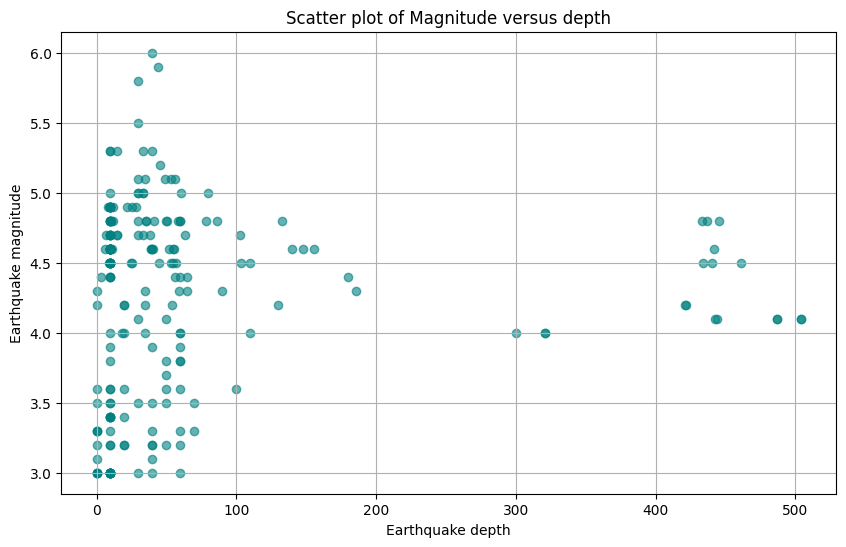

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
df_depth = pd.read_csv('output/queries/Scattering.csv')
plt.figure(figsize=(10, 6))
plt.scatter(df_depth['depth'], df_depth['magnitude'], alpha=0.6, c='teal')
plt.xlabel('Earthquake depth')
plt.ylabel('Earthquake magnitude')
plt.title('Scatter plot of Magnitude versus depth')
plt.grid(True)
plt.show()

### بزرگی زلزله در برابر زمان زلزله

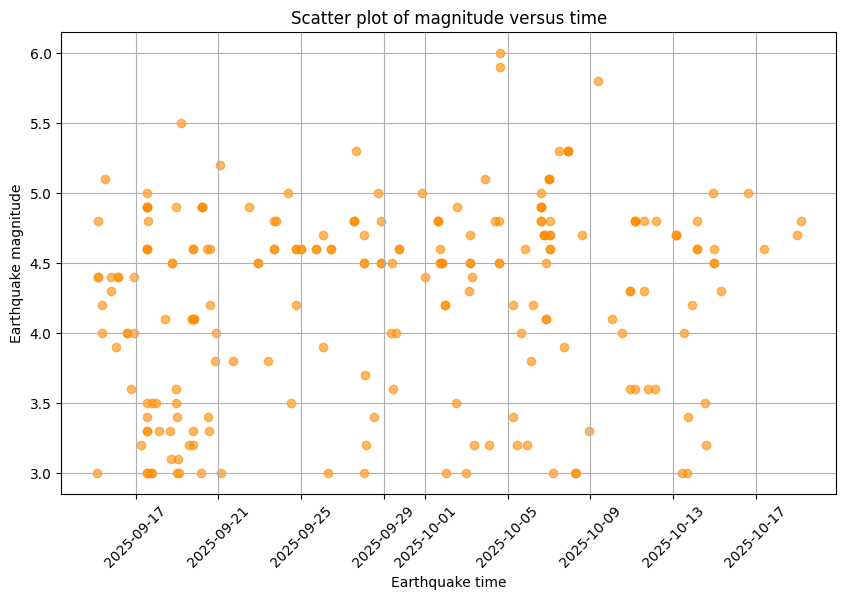

In [45]:
df_time = pd.read_csv('output/queries/Scattering2.csv')
df_time['time'] = pd.to_datetime(df_time['time'])
plt.figure(figsize=(10, 6))
plt.scatter(df_time['time'], df_time['magnitude'], alpha=0.6, c='darkorange')
plt.xlabel('Earthquake time')
plt.ylabel('Earthquake magnitude')
plt.title('Scatter plot of magnitude versus time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## نمودار خطی

### روند زمانی  شمارش زلزله ها و میانگین بزرگی زلزله ها در هر روز

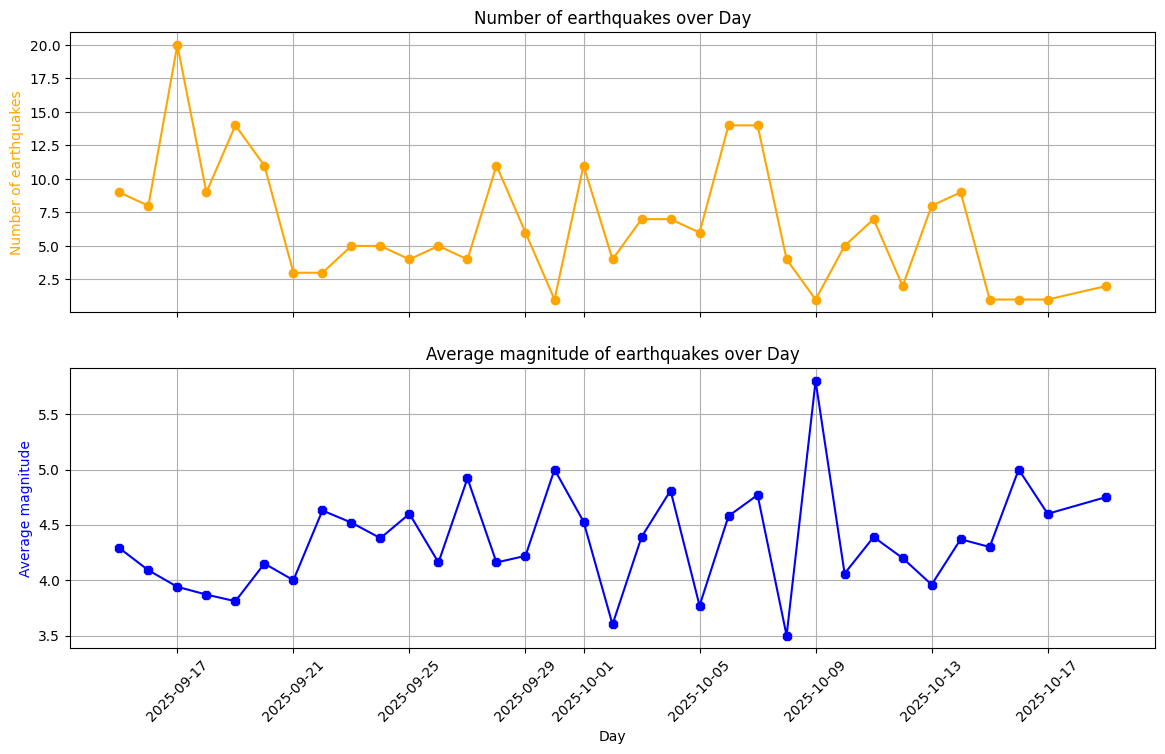

In [46]:
df = pd.read_csv("output/queries/Linear.csv")
df["day"] = pd.to_datetime(df["day"])
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

ax1.plot(df["day"], df["total_quakes"], color="orange", marker="o")
ax1.set_ylabel("Number of earthquakes", color="orange")
ax1.set_title("Number of earthquakes over Day")
ax1.grid(True)

ax2.plot(df["day"], df["avg_magnitude"], color="blue", marker="8")
ax2.set_ylabel("Average magnitude", color="blue")
ax2.set_title("Average magnitude of earthquakes over Day")
ax2.set_xlabel("Day")
ax2.grid(True)

plt.xticks(rotation=45)

plt.show()


## هیت مپ

### نقشه حرارتی توزیع جغرافیایی زلزله ها با استفاده از طول و عرض جغرافیایی زلزله های رخ داده

### نقشه اول : بر اساس دسته بندی های بسیار ریز است که در این حالت نقشه حرارتی، هر بخش خیلی کوچک دیده می شود

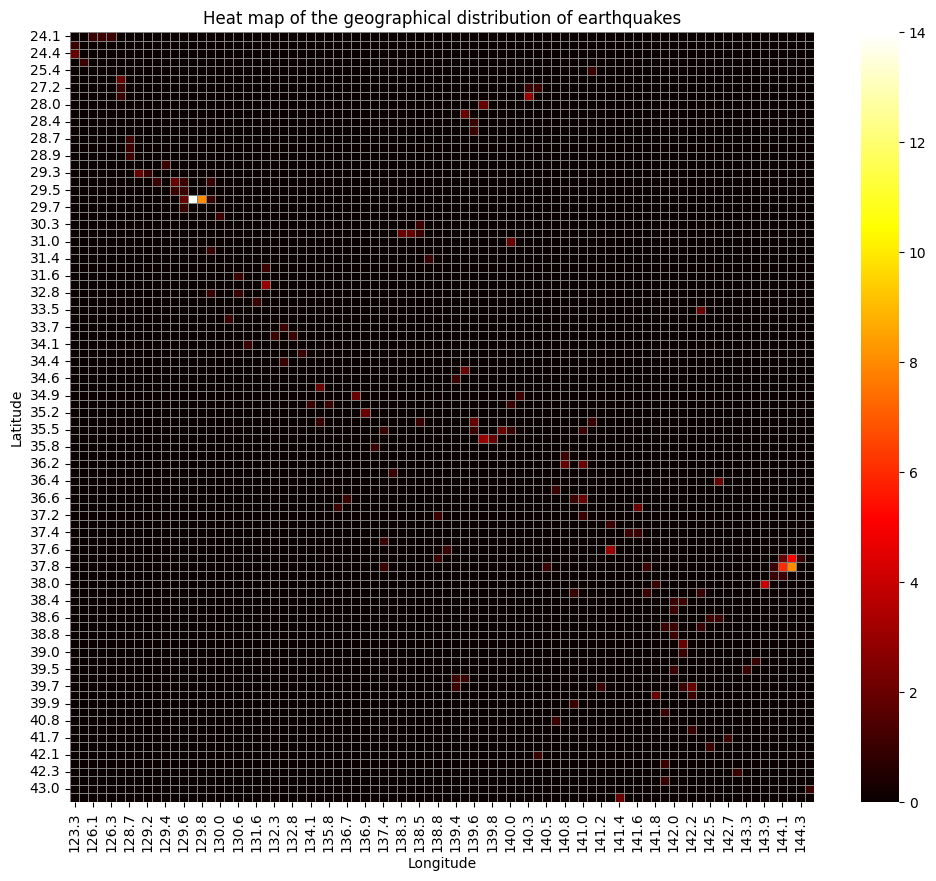

In [47]:
import seaborn as sns #برای زیبا تر کردن هیت مپ به صورت مشبکه های مربعی
df = pd.read_csv("output/queries/heatmap.csv")

heatmap_data = df.pivot_table(index="lat", columns="lon", values="quake_count", fill_value=0)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="hot", linewidths=0.5, linecolor='gray')

plt.title("Heat map of the geographical distribution of earthquakes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### نقشه دوم : بر اساس دسته بندی های بزرگتر است که در این حالت نقشه حرارتی، هر بخش خیلی بزرگتر دیده می شود

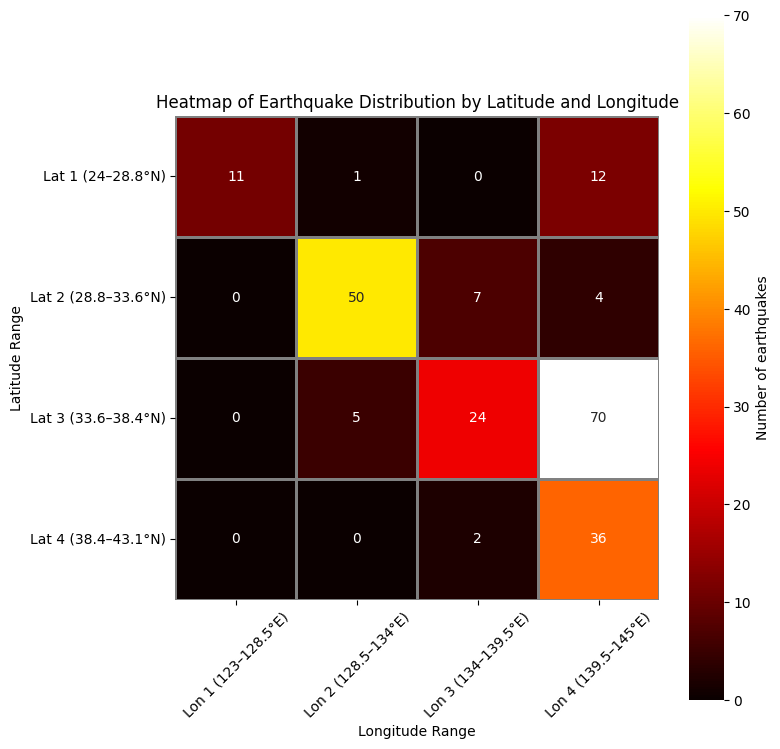

In [48]:


df = pd.read_csv("output/queries/heatmap2.csv")

heatmap_data = df.pivot_table(index="lat_range", columns="lon_range", values="quake_count", fill_value=0)

plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, cmap="hot", linewidths=1, linecolor='gray', square=True, cbar_kws={"label": "Number of earthquakes"}, annot=True)

plt.title("Heatmap of Earthquake Distribution by Latitude and Longitude")
plt.xlabel("Longitude Range")
plt.ylabel("Latitude Range")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### نقشه حرارتی زلزله های رخ داده با استفاده از فاصله کانونی زلزله تا توکیو (امتیازی)

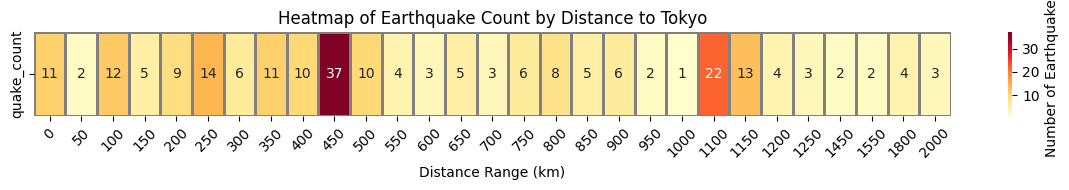

In [49]:


df = pd.read_csv("output/queries/heatmapEx.csv")

heatmap_df = df.pivot_table(index="distance_range", values="quake_count")

plt.figure(figsize=(12, 2))
sns.heatmap(
    heatmap_df.T,
    cmap="YlOrRd",
    annot=True,
    cbar_kws={"label": "Number of Earthquakes"},
    linewidths=1,
    linecolor='gray'
)

plt.title("Heatmap of Earthquake Count by Distance to Tokyo")
plt.xlabel("Distance Range (km)")
plt.ylabel("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## نمودار هیستوگرام

### برای توزیع بزرگی زلزله ها در هر منبع

### همه منابع یکجا

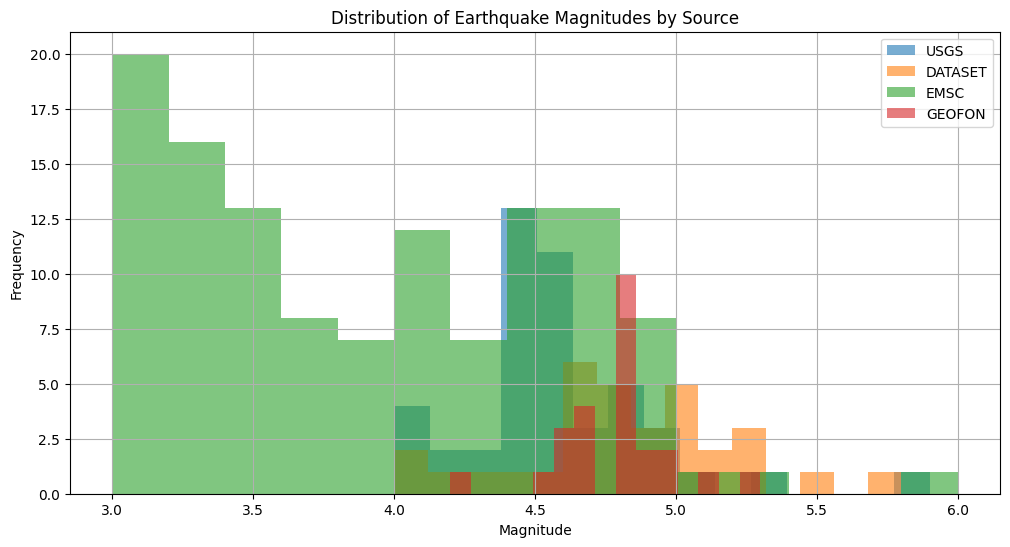

In [50]:

df = pd.read_csv("output/queries/histogramS.csv")

plt.figure(figsize=(12, 6))

sources = df['source'].unique()

for source in sources:
    magnitudes = df[df['source'] == source]['magnitude']
    plt.hist(magnitudes, bins=15, alpha=0.6, label=source)

plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Distribution of Earthquake Magnitudes by Source")#اساس توزیع بزرگی
plt.legend()
plt.grid(True)

plt.show()

### منابع به صورت جداگانه

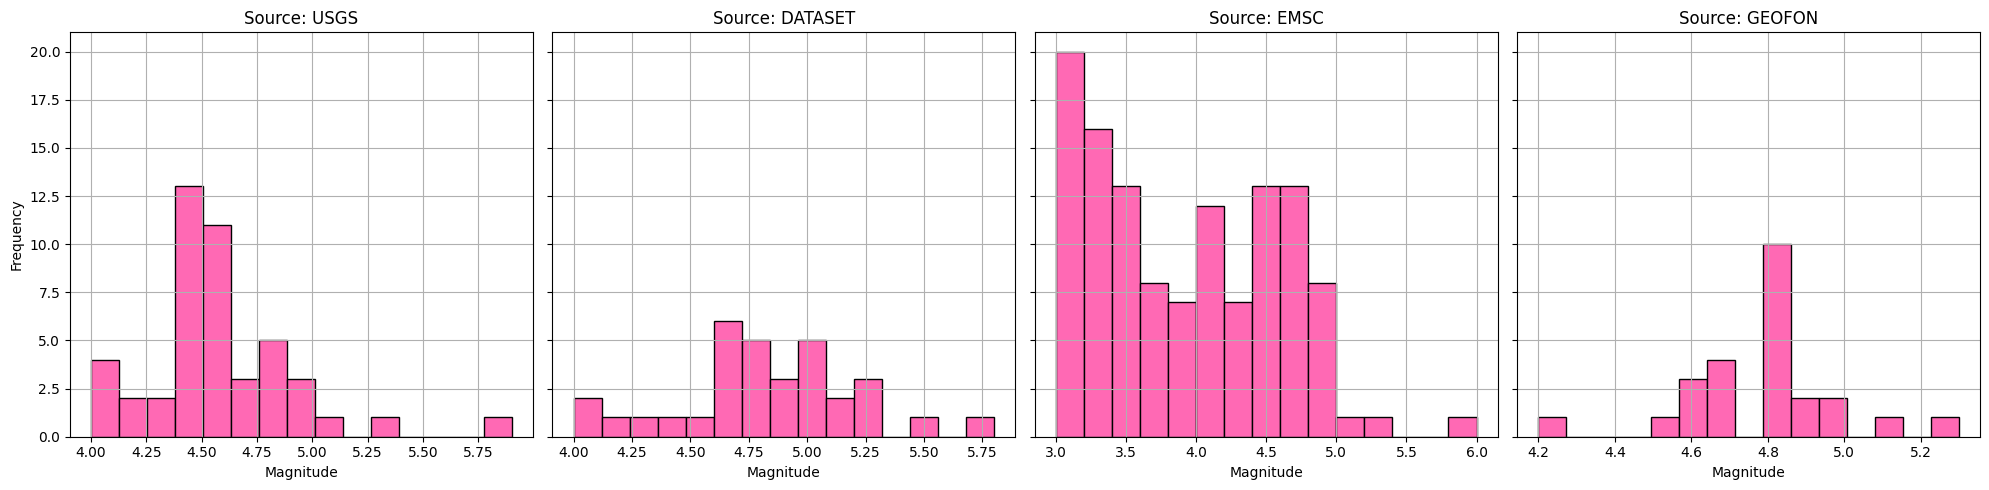

In [51]:

df = pd.read_csv("output/queries/histogramS.csv")

sources = df['source'].unique()

num_sources = len(sources)

fig, axes = plt.subplots(1, num_sources, figsize=(5*num_sources, 5), sharey=True)

for i, source in enumerate(sources):
    ax = axes[i]
    magnitudes = df[df['source'] == source]['magnitude']
    ax.hist(magnitudes, bins=15, color='hotpink', edgecolor='black')
    ax.set_title(f"Source: {source}")
    ax.set_xlabel("Magnitude")
    if i == 0:
        ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
plt.show()

## نمودار جعبه ای

### مقایسه توزیع بزرگی با عمق زلزله ها

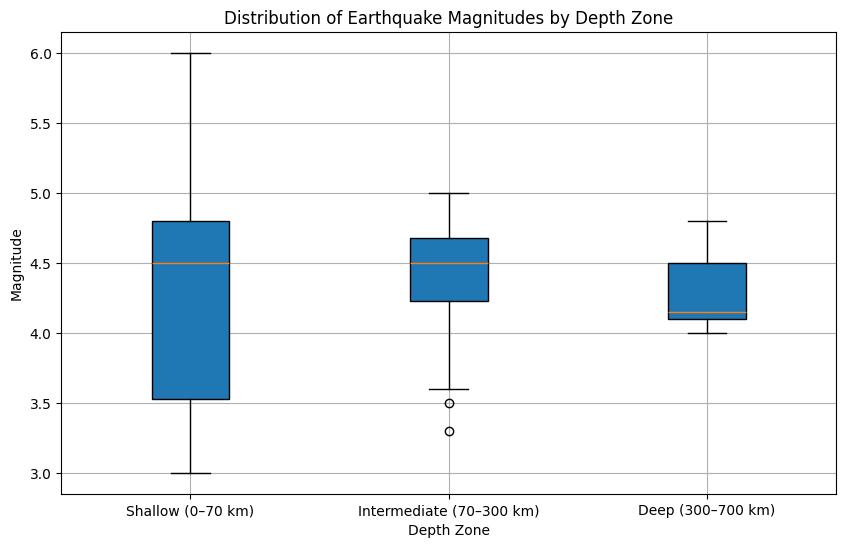

In [52]:

df = pd.read_csv("output/queries/boxPlot.csv")

grouped_data = [df[df["depth_zone"] == zone]["magnitude"].values for zone in df["depth_zone"].unique()]
labels = df["depth_zone"].unique()

plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, tick_labels=labels, patch_artist=True)

plt.title("Distribution of Earthquake Magnitudes by Depth Zone")
plt.xlabel("Depth Zone")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()